### Punto 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

No handles with labels found to put in legend.


[[ 0.   4.4]
 [ 1.   6.5]
 [ 2.  11.2]
 [ 3.  18. ]
 [ 4.  34. ]
 [ 5.  50.5]]


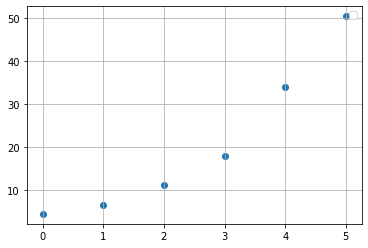

In [2]:
file_ = 'MCMC_data.dat'
data = np.loadtxt(file_, comments='#')
print(data)

X = data[:,0]
YObs = data[:,1]

Sigma = np.ones((len(X)))

plt.scatter(X,YObs)
plt.grid()
plt.legend(loc=0)

In [3]:
def Model1(x,a0,a1):
    return a0+(a1*x)

def Model2(x,a0,a1,a2):
    return a0+(a1*x)+(a2*(x**2))

def Model3(x,a0,a1):
    return a0*np.exp(a1*x)

def Chi2_1(a0,a1,model):
    if(model==1):
        Y_fit = Model1(X,a0,a1)
    elif(model==3):
        Y_fit = Model3(X,a0,a1)
    
    chi2 = 0.
    
    for i in range(len(X)):
        chi2 += (YObs[i]-Y_fit[i])**2/(2*Sigma[i]**2)
    
    return chi2

Chi2_1 = np.vectorize(Chi2_1)

def Chi2_2(a0,a1,a2):
    Y_fit = Model2(X,a0,a1,a2)
    
    chi2 = 0.
    
    for i in range(len(X)):
        chi2 += (YObs[i]-Y_fit[i])**2/(2*Sigma[i]**2)
    
    return chi2

Chi2_2 = np.vectorize(Chi2_2)

In [4]:
def Metropolis_1(a0_,a1_, WidthSteps, NSteps,model):
    
    mcmc_steps = []
    
    burn_steps = 5000
    
    for i in tqdm(range(NSteps)):
        
        # Present
        P0 = np.exp(-Chi2_1(a0_,a1_,model))
        
        a0n_ = a0_ + WidthSteps*2.*(np.random.rand()-0.5)
        a1n_ = a1_ + WidthSteps*2.*(np.random.rand()-0.5)
        
        Pn = np.exp(- Chi2_1(a0n_,a1n_,model))
        
        alpha = Pn/P0
        
        beta = np.random.rand()
        
            
        if np.minimum(1, alpha > beta):
                
            a0_ = a0n_
            a1_ = a1n_
                
        if (i >= burn_steps):
            mcmc_steps.append([a0_,a1_]) 
        
        else:
            if (i >= burn_steps):
                mcmc_steps.append([a0_,a1_])  
    
    
    mcmc_steps = np.array(mcmc_steps)
    return mcmc_steps

def Metropolis_2(a0_,a1_,a2_, WidthSteps, NSteps):
    
    mcmc_steps = []
    
    burn_steps = 5000
    
    for i in tqdm(range(NSteps)):
        
        # Present
        P0 = np.exp(-Chi2_2(a0_,a1_,a2_))
        
        
        a0n_ = a0_ + WidthSteps*2.*(np.random.rand()-0.5)
        a1n_ = a1_ + WidthSteps*2.*(np.random.rand()-0.5)
        a2n_ = a2_ + WidthSteps*2.*(np.random.rand()-0.5)
        
        Pn = np.exp(- Chi2_2(a0n_,a1n_,a2n_))
        
        alpha = Pn/P0
        
        beta = np.random.rand()
        
            
        if np.minimum(1, alpha > beta):
                
            a0_ = a0n_
            a1_ = a1n_
            a2_ = a2n_
                
        if (i >= burn_steps):
            mcmc_steps.append([a0_,a1_,a2_]) 
        
        else:
            if (i >= burn_steps):
                mcmc_steps.append([a0_,a1_,a2_])  
    
    
    mcmc_steps = np.array(mcmc_steps)
    return mcmc_steps

In [5]:
mcmc1 = Metropolis_1(10.,10.,0.3,50000,1)
mcmc2 = Metropolis_2(10.,1.,1.,0.1,50000)
mcmc3 = Metropolis_1(0.1,1.,0.1,50000,3)

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]C:\Users\Valentina\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Valentina\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:05<00:00, 8585.91it/s]


In [6]:
mean_1 = []
mean_2 = []
mean_3 = []
mcmc=[mcmc1,mcmc2,mcmc3]

for i in range(3):
    if(i!=2):
        for m in range(3):
            mean=np.percentile(mcmc[m][:,i],50)
            sigma1 = np.percentile(mcmc[m][:,i], 16.)
            sigma2 = np.percentile(mcmc[m][:,i], 84.)
            if(m==0):
                mean_1.append(mean)
            elif (m==1):
                mean_2.append(mean)
            else:  
                mean_3.append(mean)
            print(mean, sigma2-mean, mean-sigma1)
    else:
        mean=np.percentile(mcmc2[:,i],50)
        sigma1 = np.percentile(mcmc2[:,i], 16.)
        sigma2 = np.percentile(mcmc2[:,i], 84.)
        mean_2.append(mean)
        print(mean, sigma2-mean, mean-sigma1)        

-2.081191516390864 0.7300732641916541 0.7691830015991661
4.750846573001877 0.7718090443005989 0.8029702866407353
4.46778636364103 0.27918281661870115 0.31618405474584677
9.140487278118858 0.24672052377716547 0.24324862523624802
-1.0307727617552183 0.6542466136782126 0.9250895882503516
0.4887675460751249 0.015751536446230896 0.014370504284632102
2.0459649048277835 0.16655732540543378 0.14526392809329858


In [7]:
print(mean_1)
print(mean_2)
print(mean_3)

[-2.081191516390864, 9.140487278118858]
[4.750846573001877, -1.0307727617552183, 2.0459649048277835]
[4.46778636364103, 0.4887675460751249]


PARAMETROS:


MODELO1:
$$ \hat{a_0}=-2.08^{+0.71}_{-0.74},\; \hat{a_1}=9.14^{+0.23}_{-0.24} $$


MODELO2:
$$ \hat{a_0}=4.92^{+0.87}_{-0.85},\; \hat{a_1}=-1.45^{+0.70}_{-0.80}, \;\hat{a_2}=2.12^{+0.15}_{-0.14}  $$


MODELO3
$$ \hat{a_0}=4.31^{+0.27}_{-0.26},\; \hat{a_1}=0.49^{+0.01}_{-0.01} $$

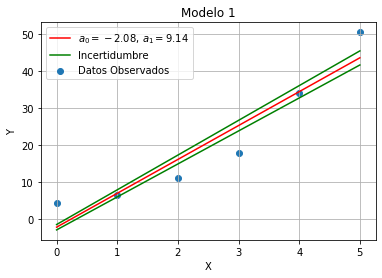

In [11]:
plt.scatter(X, YObs, label="Datos Observados")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.title("Modelo 1")

a0_estimated = mean_1[0]
a1_estimated = mean_1[1]

Xtest = np.linspace(0.,5.,30)
Yfit = Model1(Xtest, a0_estimated, a1_estimated)

YfitUp = Model1(Xtest, a0_estimated+0.71, a1_estimated+0.23)
YfitDown = Model1(Xtest, a0_estimated-0.74, a1_estimated-0.24)

plt.plot(Xtest, Yfit, c='r', label=r"$a_0= {:.2f}$, $a_1={:.2f}$".format(a0_estimated, a1_estimated))
plt.plot(Xtest, YfitUp, c='g')
plt.plot(Xtest, YfitDown, c='g',label='Incertidumbre')

plt.legend(loc=0)
plt.show()

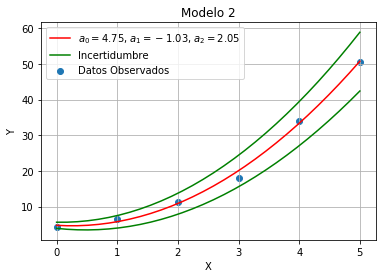

In [12]:
plt.scatter(X, YObs, label="Datos Observados")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.title("Modelo 2")

a0_estimated = mean_2[0]
a1_estimated = mean_2[1]
a2_estimated = mean_2[2]

Xtest = np.linspace(0.,5.,30)
Yfit = Model2(Xtest, a0_estimated, a1_estimated, a2_estimated)

YfitUp = Model2(Xtest, a0_estimated+0.87, a1_estimated+0.70, a2_estimated+0.15)
YfitDown = Model2(Xtest, a0_estimated-0.85, a1_estimated-0.80, a2_estimated-0.14)

plt.plot(Xtest, Yfit, c='r', label=r"$a_0= {:.2f}$, $a_1={:.2f}$, $a_2= {:.2f}$".format(a0_estimated, a1_estimated, a2_estimated))
plt.plot(Xtest, YfitUp, c='g')
plt.plot(Xtest, YfitDown, c='g',label='Incertidumbre')

plt.legend(loc=0)
plt.show()


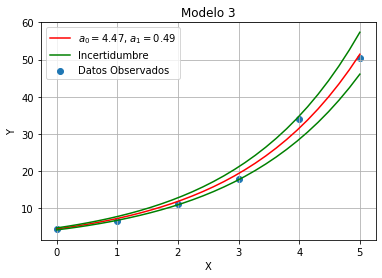

In [13]:
plt.scatter(X, YObs, label="Datos Observados")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.title("Modelo 3")

a0_estimated = mean_3[0]
a1_estimated = mean_3[1]

Xtest = np.linspace(0.,5.,30)
Yfit = Model3(Xtest, a0_estimated, a1_estimated)

YfitUp = Model3(Xtest, a0_estimated+0.27, a1_estimated+0.01)
YfitDown = Model3(Xtest, a0_estimated-0.26, a1_estimated-0.01)

plt.plot(Xtest, Yfit, c='r', label=r"$a_0= {:.2f}$, $a_1={:.2f}$".format(a0_estimated, a1_estimated))
plt.plot(Xtest, YfitUp, c='g')
plt.plot(Xtest, YfitDown, c='g', label='Incertidumbre')

plt.legend(loc=0)
plt.show()

El modelo que describe mejor los datos es el "Modelo 3" dado que la curva se ajusta a los datos y a diferencia del "Modelo 2" (que parece ser bueno también), la incertidumbre es pequeña (Incertidumbre del "Modelo 3" es menor a la del "Modelo 2").